# Polynomial Regression Tutorial 
in this tutorial we see how polynomial regression works, and how it affects the model in terms of overfitting.

In [24]:
#Importing libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
dataset = pd.read_csv('../datasets/Position_Salaries.csv')
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [26]:
# features and goal
features = dataset.iloc[:,1:2].values
goals = dataset.iloc[:,-1].values

### We have to actually build the polynomials thems selfs first

In [27]:
# define a function that return whatever degree polynomial you want
def getPolynomial(data,degree=1):
    if degree == 1 :
        return data 
    from sklearn.preprocessing import PolynomialFeatures
    poly = PolynomialFeatures(degree= degree)
    poly_features = poly.fit_transform(data)
    return poly_features

In [28]:
# define a function for plotting
def plot(feature = [], actual = [], predicted = [], degree = 1):
    plt.plot(feature, actual, '.', feature, predicted, '-')
    plt.title('model of degree = %d'%(degree))
    plt.show()

In [29]:
# get polynonmials
poly_features = []
for degree in range(1,15):
    poly_features.append(getPolynomial(features, degree=degree))
pd.DataFrame(poly_features[10])

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00
1,1.0,2.0,4.0,8.0,16.0,32.0,64.0,128.0,256.0,5.120000e+02,1.024000e+03,2.048000e+03
2,1.0,3.0,9.0,27.0,81.0,243.0,729.0,2187.0,6561.0,1.968300e+04,5.904900e+04,1.771470e+05
3,1.0,4.0,16.0,64.0,256.0,1024.0,4096.0,16384.0,65536.0,2.621440e+05,1.048576e+06,4.194304e+06
4,1.0,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1.953125e+06,9.765625e+06,4.882812e+07
5,1.0,6.0,36.0,216.0,1296.0,7776.0,46656.0,279936.0,1679616.0,1.007770e+07,6.046618e+07,3.627971e+08
6,1.0,7.0,49.0,343.0,2401.0,16807.0,117649.0,823543.0,5764801.0,4.035361e+07,2.824752e+08,1.977327e+09
7,1.0,8.0,64.0,512.0,4096.0,32768.0,262144.0,2097152.0,16777216.0,1.342177e+08,1.073742e+09,8.589935e+09
8,1.0,9.0,81.0,729.0,6561.0,59049.0,531441.0,4782969.0,43046721.0,3.874205e+08,3.486784e+09,3.138106e+10
9,1.0,10.0,100.0,1000.0,10000.0,100000.0,1000000.0,10000000.0,100000000.0,1.000000e+09,1.000000e+10,1.000000e+11


## Now let's take a look !

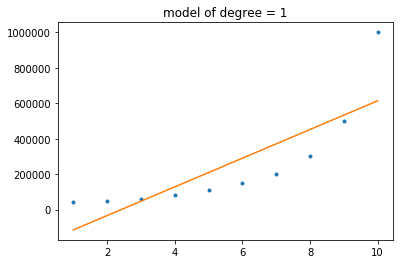

In [30]:
# import the model
from sklearn.linear_model import LinearRegression
simple_model = LinearRegression(normalize=True)
simple_model.fit(poly_features[0], goals)
plot(poly_features[0], goals, simple_model.predict(poly_features[0]),1)

## Let's see it growing !

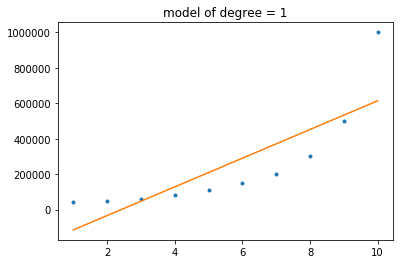

-------------------------


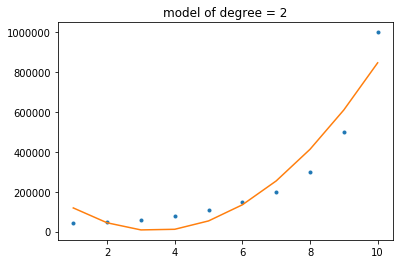

-------------------------


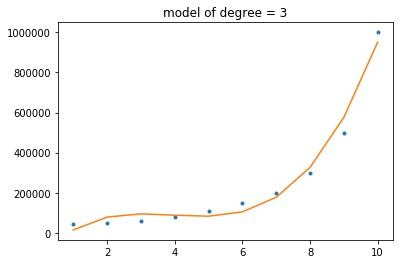

-------------------------


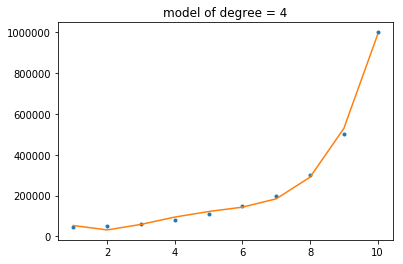

-------------------------


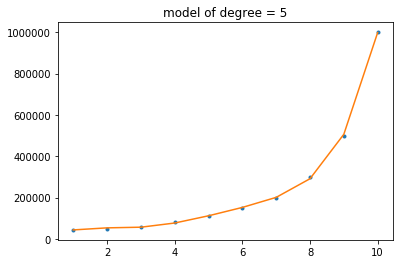

-------------------------


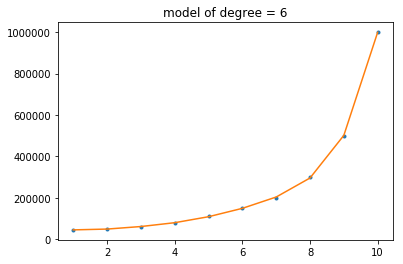

-------------------------


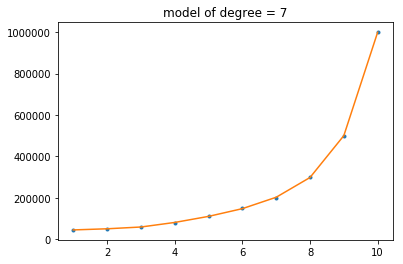

-------------------------


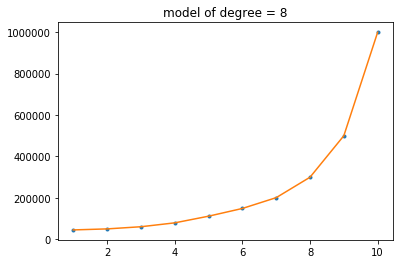

-------------------------


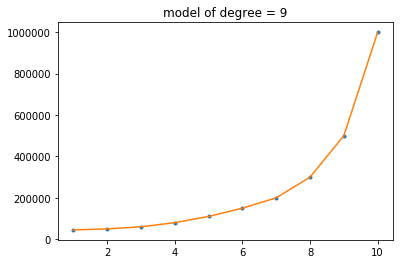

-------------------------


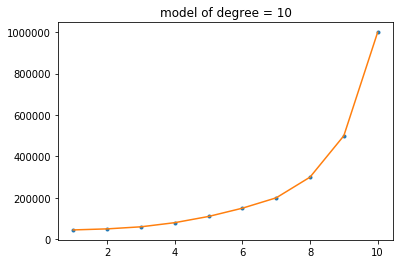

-------------------------


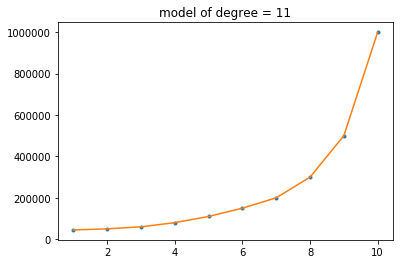

-------------------------


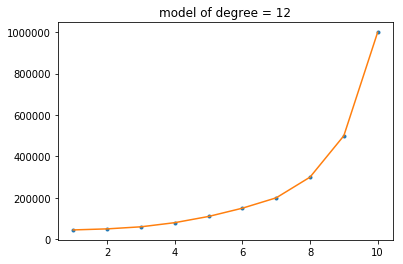

-------------------------


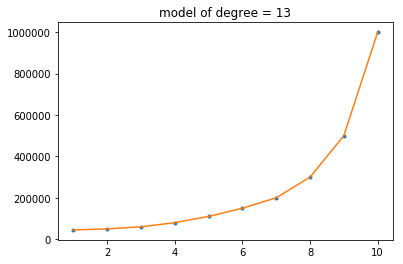

-------------------------


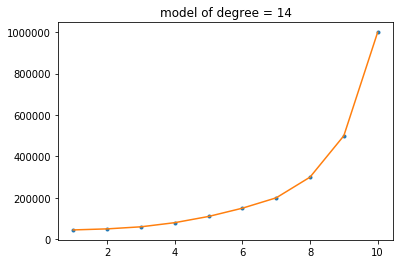

-------------------------


In [31]:
coeff_array = []
for degree in range(0,len(poly_features)):
    simple_model.fit(poly_features[degree], goals)
    plot(poly_features[0],goals,simple_model.predict(poly_features[degree]),degree+1)
    coeff_array.append(simple_model.coef_)
    print("-------------------------")

In [32]:
pd.DataFrame(coeff_array)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,80878.787879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,-1.328712e+05,1.943182e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,1.806643e+05,-4.854895e+04,4.120047e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.000000,-2.110023e+05,9.476544e+04,-1.546329e+04,890.151515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,1.607310e+05,-1.003788e+05,2.816492e+04,-3446.386946,157.692308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000000,-8.294400e+04,6.589640e+04,-2.438196e+04,4929.086538,-495.432692,19.791667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.000000,2.198740e+05,-1.855927e+05,7.844800e+04,-17956.903595,2326.266340,-161.070261,4.697712,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000000,-6.111207e+05,6.171946e+05,-3.215624e+05,96489.710989,-17187.275327,1795.700572,-101.701097,2.418155,NaN,NaN,NaN,NaN,NaN,NaN
8,0.000000,2.007325e+06,-2.233774e+06,1.337762e+06,-480652.777789,108553.530095,-15506.944445,1358.052249,-66.468254,1.391645,NaN,NaN,NaN,NaN,NaN
9,-1.550270,1.151053e+06,-1.206311e+06,6.602693e+05,-205375.541619,35881.509518,-2796.319591,-104.161445,39.874560,-3.039306,0.080563,NaN,NaN,NaN,NaN


# Well,See what happens to the weights as the model complexity increases ?